In [107]:
import pandas as pd
import itertools as it
import numpy as np
import networkx as nx
from networkx.algorithms import community as nxcom
from networkx import degree_seq
import matplotlib.pyplot as plt
import statistics as stat
import powerlaw as pw

In [3]:
model1_pixar = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_pixar.csv')
model1_dreamworks = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_dreamworks.csv')
model1_disney = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_disney.csv')

In [4]:
print("Pixar:", model1_pixar[0:2])
print("DreamWorks:", model1_dreamworks[0:2])
print("Disney:", model1_disney[0:2])

Pixar:    Unnamed: 0         source          target      film  year studio
0           0  John Lasseter     Pete Docter  ToyStory  1995  Pixar
1           1  John Lasseter  Andrew Stanton  ToyStory  1995  Pixar
DreamWorks:    Unnamed: 0        source       target  film  year      studio
0           0  Eric Darnell  Tim Johnson  Antz  1998  DreamWorks
1           1  Eric Darnell  Todd Alcott  Antz  1998  DreamWorks
Disney:    Unnamed: 0            source           target       film  year  studio
0           0  William Cottrell       David Hand  SnowWhite  1937  Disney
1           1  William Cottrell  Wilfred Jackson  SnowWhite  1937  Disney


In [5]:
#Concatenate the data sets into one
model1 = pd.concat([model1_pixar, model1_dreamworks, model1_disney])
model1.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_edges.csv')

In [6]:
print("model1:", len(model1), model1[0:9])

model1: 11583    Unnamed: 0         source            target      film  year studio
0           0  John Lasseter       Pete Docter  ToyStory  1995  Pixar
1           1  John Lasseter    Andrew Stanton  ToyStory  1995  Pixar
2           2  John Lasseter         Joe Ranft  ToyStory  1995  Pixar
3           3  John Lasseter       Joss Whedon  ToyStory  1995  Pixar
4           4  John Lasseter        Joel Cohen  ToyStory  1995  Pixar
5           5  John Lasseter      Alec Sokolow  ToyStory  1995  Pixar
6           6  John Lasseter     Bonnie Arnold  ToyStory  1995  Pixar
7           7  John Lasseter        Ed Catmull  ToyStory  1995  Pixar
8           8  John Lasseter  Ralph Guggenheim  ToyStory  1995  Pixar


In [7]:
model1

Unnamed: 0         source          target      film  year  studio
0              0  John Lasseter     Pete Docter  ToyStory  1995   Pixar
1              1  John Lasseter  Andrew Stanton  ToyStory  1995   Pixar
2              2  John Lasseter       Joe Ranft  ToyStory  1995   Pixar
3              3  John Lasseter     Joss Whedon  ToyStory  1995   Pixar
4              4  John Lasseter      Joel Cohen  ToyStory  1995   Pixar
...          ...            ...             ...       ...   ...     ...
8354          73   Jennifer Lee   Clark Spencer  RalphNet  2018  Disney
8355          74   Jennifer Lee  Chris Williams  RalphNet  2018  Disney
8356          75  Brad Simonsen   Clark Spencer  RalphNet  2018  Disney
8357          76  Brad Simonsen  Chris Williams  RalphNet  2018  Disney
8358          77  Clark Spencer  Chris Williams  RalphNet  2018  Disney

[11583 rows x 6 columns]

#### Drawing the Network

In [8]:
G = nx.from_pandas_edgelist(model1, source = 'source', target = 'target', create_using=nx.Graph())

In [9]:
print("Nodes: {}. Edges: {}".format(len(G.nodes), len(G.edges)))

Nodes: 683. Edges: 9545


C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


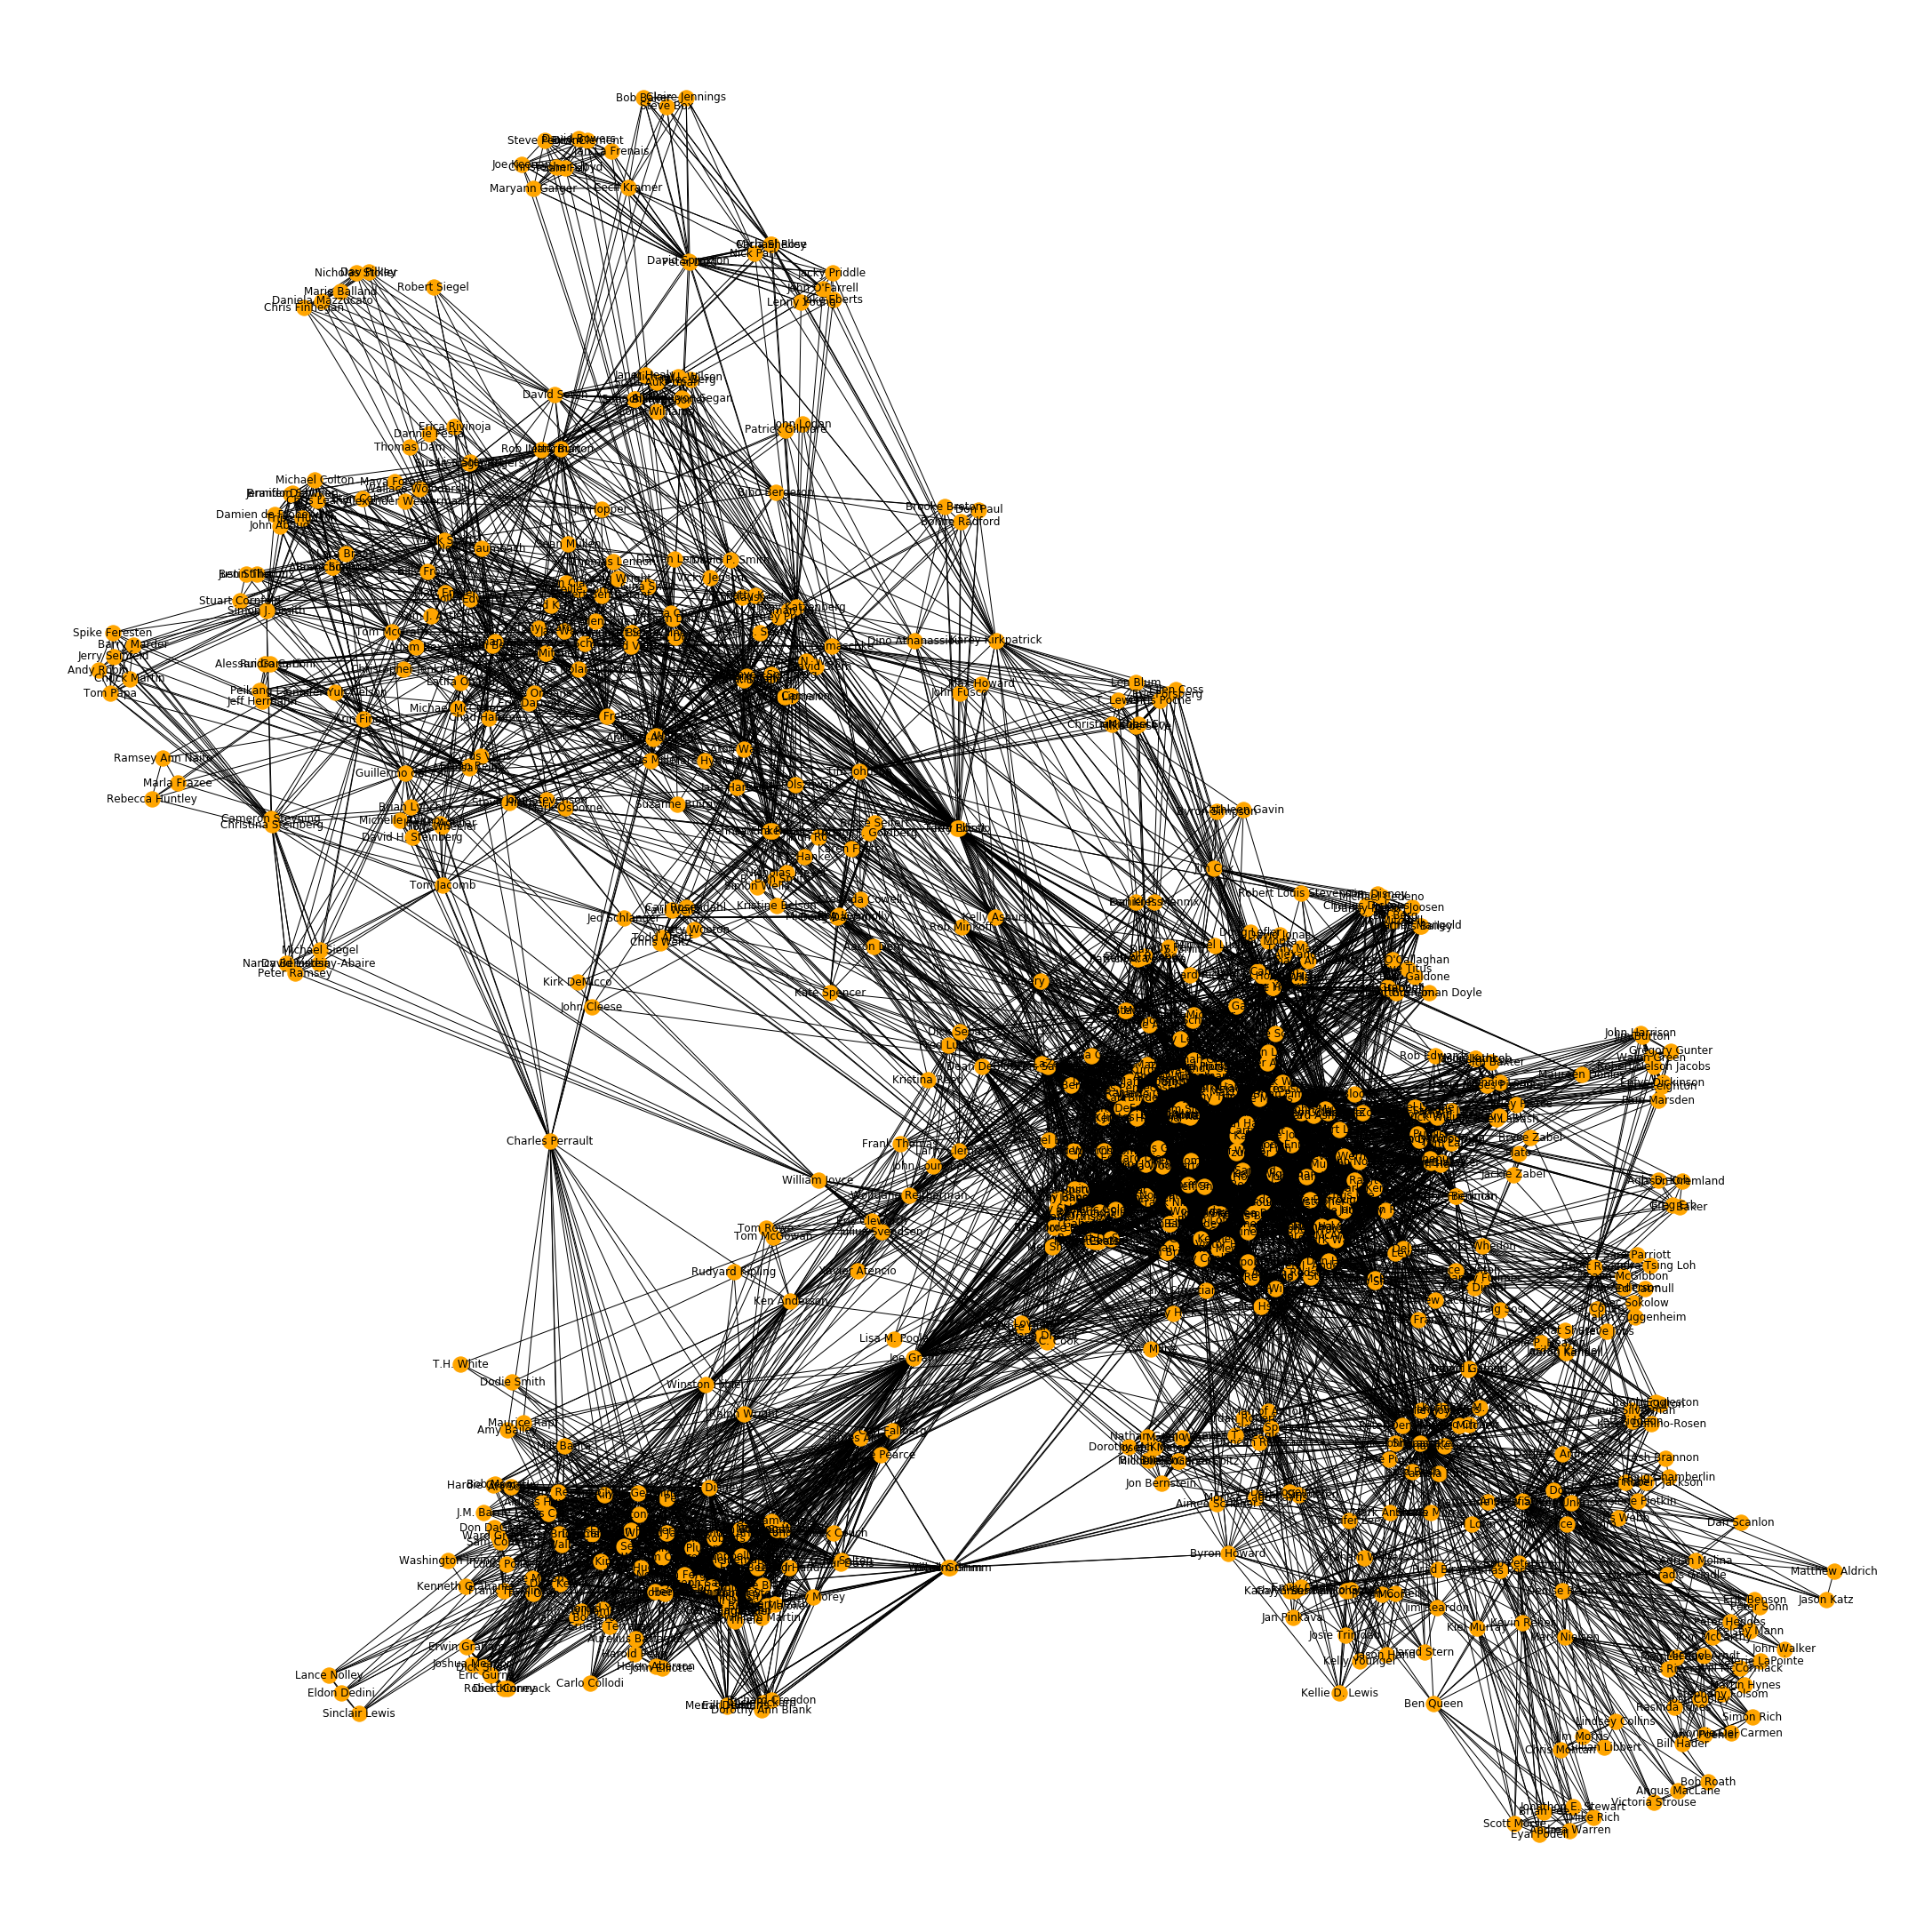

In [10]:
#Graph 1
plt.figure(figsize = (30, 30))
nx.draw_spring(G, with_labels=True, node_color='orange')

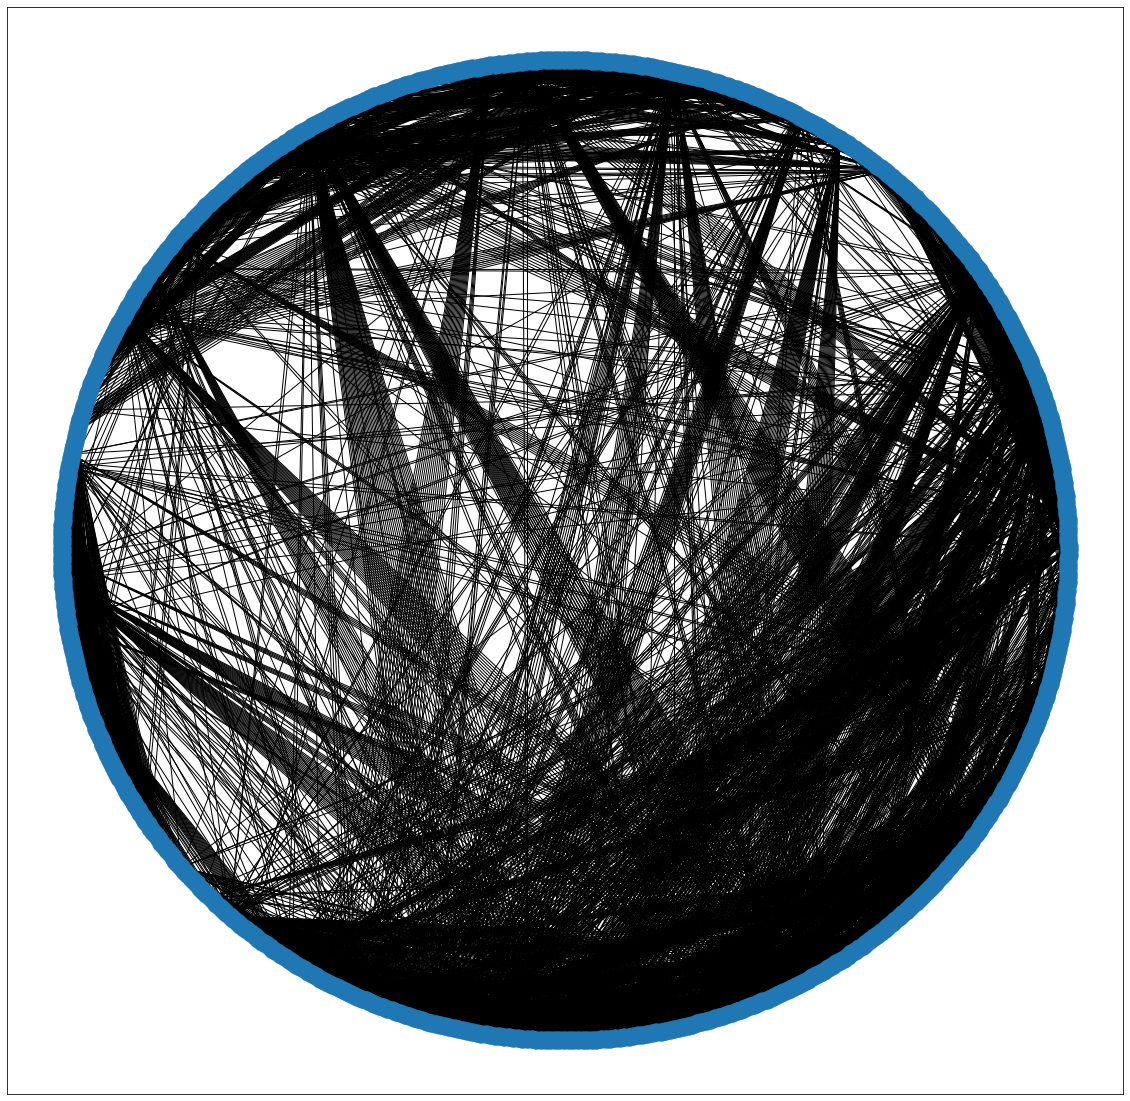

In [11]:
#Graph 2
plt.figure(figsize = (20, 20))
nx.draw_networkx(G, pos = nx.circular_layout(G), with_labels=False)

The links almost resembles a random network. We expect that in this network where almost all the nodes have collaborated with each other, the network is almost random.

#### Degree distribution: Is this network scale-free?

In [12]:
#Take the degrees
degrees = [G.degree(node) for node in G]
degrees.sort(reverse=True)
kmin = min(degrees)
kmax = max(degrees)
print("Degree sequence", degrees)
print("Degree min", kmin)
print("Degree max", kmax)
print("Degree mean", stat.mean(degrees))
print("Degree sd", stat.stdev(degrees))

Degree sequence [176, 164, 138, 123, 116, 113, 112, 112, 108, 108, 101, 96, 92, 92, 91, 88, 88, 87, 86, 85, 85, 85, 82, 82, 81, 81, 81, 80, 79, 79, 78, 78, 78, 78, 77, 76, 72, 72, 72, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 68, 68, 67, 66, 66, 64, 64, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 58, 58, 57, 57, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 47, 47, 47, 47, 46, 46, 46, 46, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 40, 40, 40, 39, 39, 39, 39, 39, 38, 38, 38, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 

#### Configuration Model

In [128]:
# Find degrees
degree_sequence = dict(nx.degree(G)).values()
# Generate a random network with the same node degrees
G_configuration = nx.degree_seq.configuration_model(degree_sequence)
G_DP = nx.Graph(G_configuration)
G_DP.remove_edges_from(G_DP.selfloop_edges())

In [129]:
#Clustering
print("Transitivity:", nx.transitivity(G_DP))
print("Average clustering:", nx.average_clustering(G_DP))

#Diameter: longest path
print("Diameter:", nx.diameter(G_DP))

#Average path
print("Average shortest path", nx.average_shortest_path_length(G_DP))

Transitivity: 0.09158853288364249
Average clustering: 0.09433085283825098
Diameter: 4
Average shortest path 2.3286303740183683


In [122]:
#We shall use the powerlaw package developed by Alstott, et al.
fit = pw.Fit(degrees)

Calculating best minimal value for power law fit


Text(0, -50, 'Note: The black solid line is the theoretical power law distribution.')

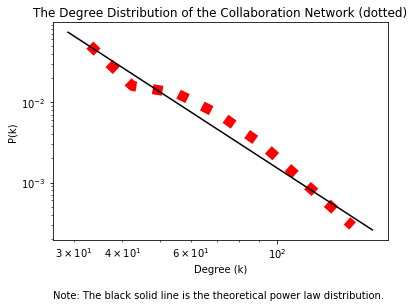

In [136]:
#Plot of the strength distribution in Log-log scale and the theoretical pdf
fig1 = fit.plot_pdf(color='r', linewidth = 10, linestyle= ":")
fit.power_law.plot_pdf(color='black', linestyle="-", ax=fig1)
plt.title('The Degree Distribution of the Collaboration Network (dotted)')
plt.ylabel('P(k)')
plt.xlabel('Degree (k)')
plt.annotate('Note: The black solid line is the theoretical power law distribution.', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')

In [17]:
#MLE Estimate of alpha, [Clauset, et al. 2009]
print("MLE for alpha:", fit.power_law.alpha)

MLE for alpha: 3.1353514623750867


#### Size of the network

In [18]:
#Diameter: longest path
print("Diameter:", nx.diameter(G))

#Average path
print("Average shortest path", nx.average_shortest_path_length(G))

Diameter: 5
Average shortest path 2.8424107890409314


In [19]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([list(length_target.values())
        for length_target in length_source_target.values()], [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()

([<matplotlib.axis.XTick at 0x2698a307108>,
 <a list of 6 Text xticklabel objects>)

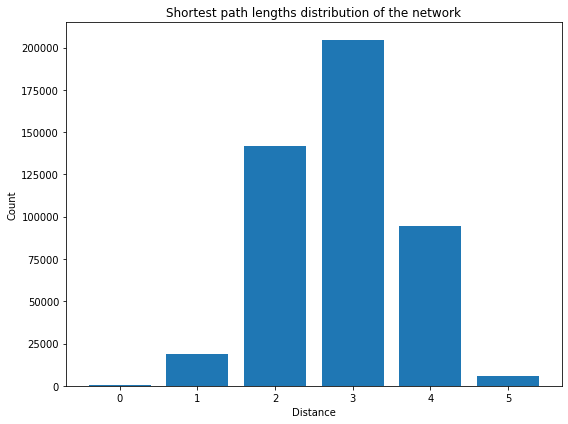

In [131]:
path_length_histogram(G, title="Shortest path lengths distribution of the network")
plt.xticks(range(nx.diameter(G)+1))

#### Measures of Centrality

In [44]:
#Finding the emissaries of Disney-Pixar
#These are the nodes who worked for Disney-Pixar movies and Dreamworks too
nodes_disney = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/nodes_disney.csv')[['0', 'studio']].rename(columns = {'0': 'nodes'})
nodes_pixar = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/nodes_pixar.csv')[['0', 'studio']].rename(columns = {'0': 'nodes'})
nodes_dreamworks = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/nodes_dreamworks.csv')[['0', 'studio']].rename(columns = {'0': 'nodes'})


In [51]:
print(type(nodes_disney))
print(type(nodes_pixar))
print(type(nodes_dreamworks))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [60]:
disney_dream = pd.merge(nodes_disney, nodes_dreamworks, on = 'nodes', how = 'inner')
pixar_dream = pd.merge(nodes_pixar, nodes_dreamworks, on = 'nodes', how = 'inner')
emissaries = pd.concat([disney_dream, pixar_dream])

In [62]:
emissaries

nodes studio_x    studio_y
0    Charles Perrault   Disney  dreamworks
1             Jim Cox   Disney  dreamworks
2   Karey Kirkpatrick   Disney  dreamworks
3      Brenda Chapman   Disney  dreamworks
4       Chris Sanders   Disney  dreamworks
5        Kelly Asbury   Disney  dreamworks
6         Ted Elliott   Disney  dreamworks
7        Terry Rossio   Disney  dreamworks
8         Rob Minkoff   Disney  dreamworks
9          Lorna Cook   Disney  dreamworks
10    Philip LaZebnik   Disney  dreamworks
11     Kendra Haaland   Disney  dreamworks
12       Dean DeBlois   Disney  dreamworks
13      Bonnie Arnold   Disney  dreamworks
14      Lorne Cameron   Disney  dreamworks
15     David Hoselton   Disney  dreamworks
16     Michael Lucker   Disney  dreamworks
17      William Joyce   Disney  dreamworks
18      Kristina Reed   Disney  dreamworks
0       Bonnie Arnold    pixar  dreamworks
1      Bradford Lewis    pixar  dreamworks
2      Brenda Chapman    pixar  dreamworks

#### We then sort these emissaries by their betweenness

In [73]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
inbetween = pd.DataFrame()
inbetween['nodes'] = betweenness.keys()
inbetween['betweenness'] = betweenness.values()

In [81]:
#Extract the betweenness centrality of the emissaries
emissaries_inbetween = pd.merge(emissaries, inbetween, on = 'nodes', how = 'inner').sort_values(by = ['betweenness'], ascending = False)
print(emissaries_inbetween[0:10])
emissaries_inbetween.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/emissaries_inbetween.csv')

               nodes studio_x    studio_y   betweenness
5      Chris Sanders   Disney  dreamworks  11726.133536
3     Brenda Chapman   Disney  dreamworks  10058.595838
4     Brenda Chapman    pixar  dreamworks  10058.595838
14     Bonnie Arnold   Disney  dreamworks   9970.379224
15     Bonnie Arnold    pixar  dreamworks   9970.379224
0   Charles Perrault   Disney  dreamworks   9001.027013
7        Ted Elliott   Disney  dreamworks   6936.972816
8       Terry Rossio   Disney  dreamworks   6936.972816
9        Rob Minkoff   Disney  dreamworks   6709.279702
6       Kelly Asbury   Disney  dreamworks   5698.903801


#### Clustering

In [21]:
#Global clustering
print("Transitivity:", nx.transitivity(G))
print("Average clustering:", nx.average_clustering(G))

Transitivity: 0.5031181364926175
Average clustering: 0.8022998805979474


#### Measures of Centrality: The hubs and the closest in DreamWorks

In [85]:
#We draw the network of DreamWorks
G1 = nx.from_pandas_edgelist(model1_dreamworks, source = 'source', target = 'target', create_using=nx.Graph())

In [93]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G1)
tophubs = sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]
print("The top 10 hubs:", tophubs)

The top 10 hubs: [('Jeffrey Katzenberg', 0.20126273734982936), ('Conrad Vernon', 0.1965920742290589), ('Andrew Adamson', 0.19085399898569022), ('John H. Williams', 0.19085399898569022), ('Aron Warner', 0.1822484671807512), ('Terry Rossio', 0.1819877004294586), ('Ted Elliott', 0.1819877004294586), ('William Steig', 0.16871065862248338), ('Joe Stillman', 0.16871065862248338), ('Roger S.H. Schulman', 0.16871065862248338)]


In [95]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G1)
hubs = pd.DataFrame()
hubs['nodes'] = eigenvector.keys()
hubs['eigenvector'] = eigenvector.values()

#Closeness Centrality
closeness = nx.closeness_centrality(G1)
closest = pd.DataFrame()
closest['nodes'] = closeness.keys()
closest['eigenvector'] = closeness.values()

In [106]:
#Top 10 hubs sorted by their closeness centrality
tophubs = pd.merge(hubs, closest, on = 'nodes', how = 'inner').rename(columns = {'eigenvector_x': 'eigenvector',
                                                                               'eigenvector_y': 'closeness'}).sort_values(by = ['eigenvector', 'closeness'], 
                                                                                                                          ascending = False)
print("Top-10 Hubs sorted by closeness:\n", tophubs[0:10])
tophubs.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/tophubs.csv')

Top-10 Hubs sorted by closeness:
                   nodes  eigenvector  closeness
17   Jeffrey Katzenberg     0.201263   0.546798
47        Conrad Vernon     0.196592   0.526066
40       Andrew Adamson     0.190854   0.496644
50     John H. Williams     0.190854   0.496644
9           Aron Warner     0.182248   0.505695
23         Terry Rossio     0.181988   0.480519
24          Ted Elliott     0.181988   0.480519
42        William Steig     0.168711   0.457732
43         Joe Stillman     0.168711   0.457732
44  Roger S.H. Schulman     0.168711   0.457732


In [89]:
#Local Clustering Coefficient of the top-10 Hubs
clustering = nx.clustering(G1)
print("The local clustering coeff of the top 10 hubs:")
[(x, clustering[x]) for x in sorted(G1, key=lambda x:eigenvector[x], reverse=True)[0:10]]

The local clustering coeff of the top 10 hubs:


[('Jeffrey Katzenberg', 0.22847399829497017),
 ('Conrad Vernon', 0.38743961352657),
 ('Andrew Adamson', 0.41835748792270533),
 ('John H. Williams', 0.41835748792270533),
 ('Aron Warner', 0.4418604651162791),
 ('Terry Rossio', 0.4529616724738676),
 ('Ted Elliott', 0.4529616724738676),
 ('William Steig', 0.5882352941176471),
 ('Joe Stillman', 0.5882352941176471),
 ('Roger S.H. Schulman', 0.5882352941176471)]